In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy as sp

In [2]:
dataFolder = 'WizardGemsData'
files = os.listdir(dataFolder)

In [3]:
colNames = ['correct_response', 'response'] + ['bars'+str(i) for i in np.arange(5)+1] + ['weights'+str(i) for i in np.arange(5)+1] + ['condition', 'RT']

In [4]:
dataList = []
data = pd.DataFrame()
for file in files:
    dataSub = pd.read_csv(dataFolder + '/' + file, usecols=[0,1,4,5,6,7,8,9,10,11,12,13,14,15], names=colNames, skiprows=[0])
    dataSub.insert(loc=0, column='sub', value=int(''.join([file[i] for i in np.arange(3,file.find('_'))])))
    dataSub.insert(loc=1, column='NTrials', value=dataSub.shape[0])
    dataSub.insert(loc=2, column='iTrial', value=np.arange(dataSub.shape[0])+1)
    dataSub.insert(loc=3, column='block', value=np.ceil(dataSub['iTrial'].values/10))
    dataSub.insert(loc=3, column='NBlocks', value=dataSub['block'].max())
    dataList.append(dataSub)
    data = data.append(dataSub)

In [5]:
data.head(30)

sub  NTrials  iTrial  NBlocks  block  correct_response   response  bars1  \
0   116      560       1     56.0    1.0             65.68  59.252930     77   
1   116      560       2     56.0    1.0             49.63  15.020508     22   
2   116      560       3     56.0    1.0             27.79  84.531250     69   
3   116      560       4     56.0    1.0             51.97   9.502930     61   
4   116      560       5     56.0    1.0             46.50  29.381836     54   
5   116      560       6     56.0    1.0             54.30  68.476562     43   
6   116      560       7     56.0    1.0             69.35  35.541016     81   
7   116      560       8     56.0    1.0             54.50  27.655273     30   
8   116      560       9     56.0    1.0             42.84  44.830078     55   
9   116      560      10     56.0    1.0             67.27  79.730469     75   
10  116      560      11     56.0    2.0             55.99  23.959961     39   
11  116      560      12     56.0    2.0             60.81  62.272461     94   
12  116      560      13     56.0    2.0             53.14  83.813477     60   
13  116      560      14     56.0    2.0             34.40  17.476562     36   
14  116      560      15     56.0    2.0             36.49  43.612305      4   
15  116      560      16     56.0    2.0             68.56  73.277344      4   
16  116      560      17     56.0    2.0             49.64  57.667969     61   
17  116      560      18     56.0    2.0             31.58  28.991211      3   
18  116      560      19     56.0    2.0             36.18  88.768555     48   
19  116      560      20     56.0    2.0             43.28  45.501953     50   
20  116      560      21     56.0    3.0             28.69  26.795898     58   
21  116      560      22     56.0    3.0             24.13  48.046875     72   
22  116      560      23     56.0    3.0             45.77  30.883789     30   
23  116      560      24     56.0    3.0             38.67  72.999023     34   
24  116      560      25     56.0    3.0             31.51  39.465820     22   
25  116      560      26     56.0    3.0             33.95  47.026367     60   
26  116      560      27     56.0    3.0             31.75  93.484375     25   
27  116      560      28     56.0    3.0             47.58  94.538086     93   
28  116      560      29     56.0    3.0             64.70  92.039062     57   
29  116      560      30     56.0    3.0             50.32  79.883789     71   

    bars2  bars3  bars4  bars5  weights1  weights2  weights3  weights4  \
0       2     63     75     50      0.12      0.02      0.55      0.25   
1      20     76     17      9      0.12      0.02      0.55      0.25   
2      95      0     51     81      0.12      0.02      0.55      0.25   
3      72     29     92     71      0.12      0.02      0.55      0.25   
4      14     37     67     44      0.12      0.02      0.55      0.25   
5      62     51     65     60      0.12      0.02      0.55      0.25   
6      52     91     32      9      0.12      0.02      0.55      0.25   
7      11     83      5     63      0.12      0.02      0.55      0.25   
8      82     20     86     35      0.12      0.02      0.55      0.25   
9      30     88     33     17      0.12      0.02      0.55      0.25   
10      9     82     15     38      0.12      0.02      0.55      0.25   
11     99     46     83     25      0.12      0.02      0.55      0.25   
12     90     53     59      4      0.12      0.02      0.55      0.25   
13      8     31     33     77      0.12      0.02      0.55      0.25   
14     43     31     64     35      0.12      0.02      0.55      0.25   
15     88     76     88     42      0.12      0.02      0.55      0.25   
16     51     60     26     30      0.12      0.02      0.55      0.25   
17     30     24     56     57      0.12      0.02      0.55      0.25   
18     29      6     98     34      0.12      0.02      0.55      0.25   
19     98     44     32     52      0.12   

In [6]:
subList = data['sub'].unique()
NSub = len(subList)

### Absolute error over time

In [7]:
data['absError'] = np.abs(data['correct_response'] - data['response'])

Text(0.5, 0, 'trial')

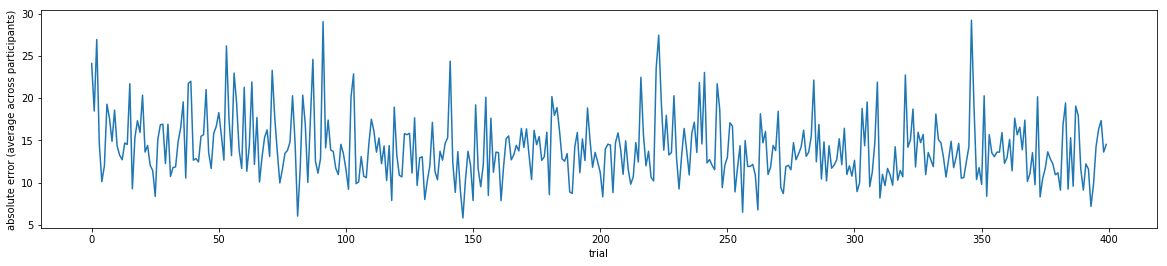

In [31]:
learningCurves = np.empty((NSub, data['NTrials'].max()))
learningCurves[:] = np.nan
plt.subplots(1,1,figsize=(20,4))
for iSub, sub in enumerate(subList):
    dataSub = data[data['sub']==sub]
    learningCurves[iSub,np.arange(dataSub.loc[0,'NTrials'])] = dataSub['absError'].values
plt.plot(np.mean(learningCurves,axis=0))
plt.ylabel('absolute error (average across participants)')
plt.xlabel('trial')

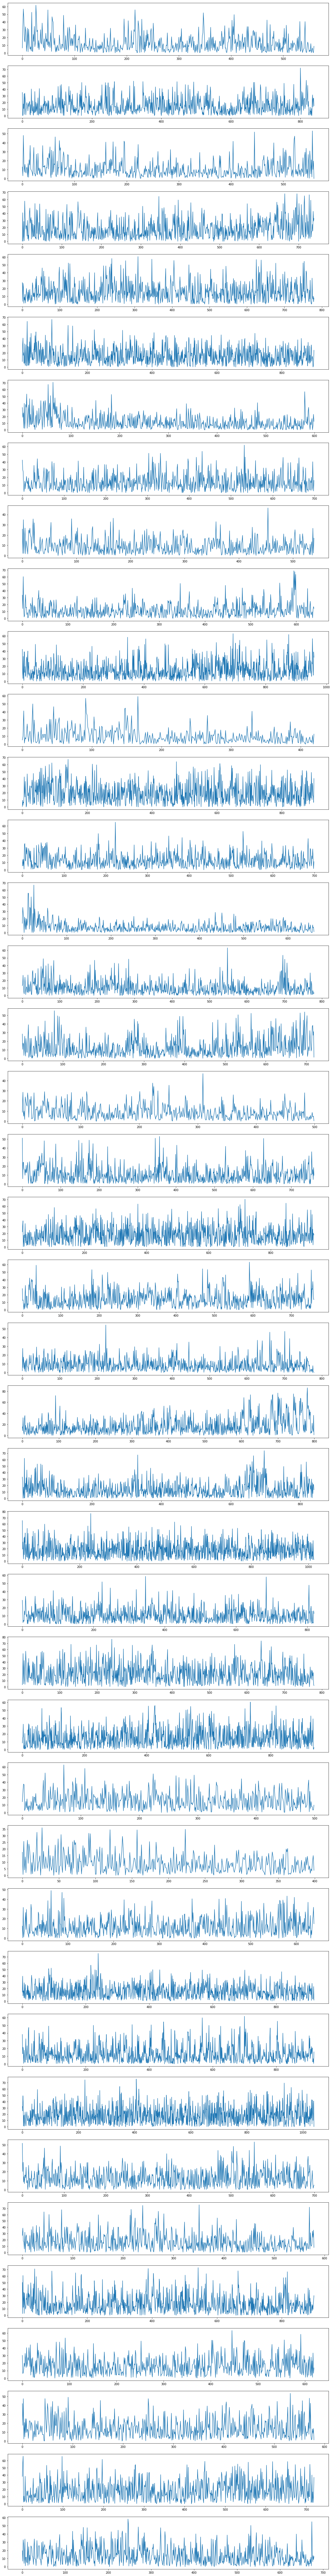

In [113]:
fig, axes = plt.subplots(len(subList),1,figsize=(20,4*len(subList)))
for iSub, sub in enumerate(subList):
    axes[iSub].plot(data.loc[data['sub']==sub, 'absError'])

condition
0    13.605326
1    14.591797
Name: absError, dtype: float64


Text(0, 0.5, 'absolute error')

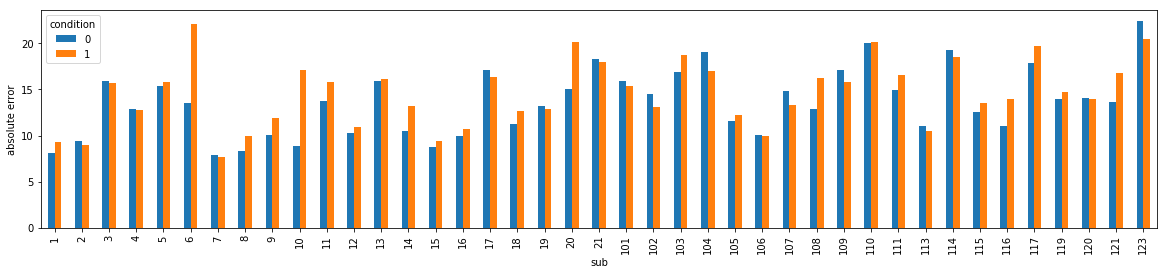

In [99]:
fig, ax = plt.subplots(1,1,figsize=(20,4))
data.groupby(['sub','condition']).mean()['absError'].unstack().plot(kind='bar', ax=ax)
print(data.groupby(['sub','condition']).mean()['absError'].groupby('condition').mean())
ax.set_ylabel('absolute error')

half
1    14.361958
2    13.835164
Name: absError, dtype: float64


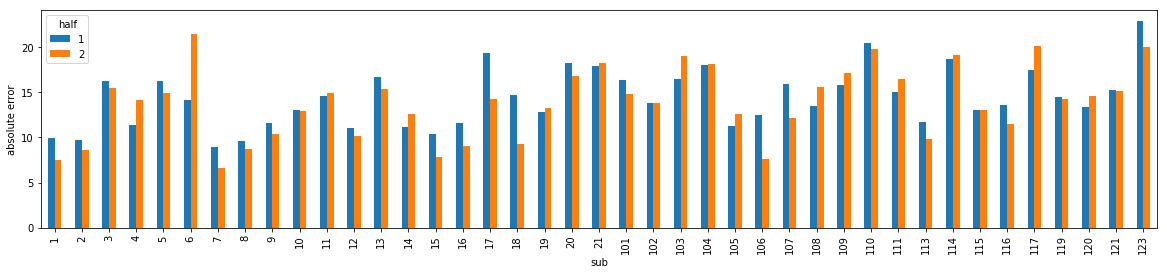

In [30]:
datatmp = data.copy()
datatmp['half'] = 1 * (datatmp['iTrial']<=datatmp['NTrials']/2) + 2 * (datatmp['iTrial']>datatmp['NTrials']/2)
fig, ax = plt.subplots(1,1,figsize=(20,4))
datatmp.groupby(['sub','half']).mean()['absError'].unstack().plot(kind='bar', ax=ax)
ax.set_ylabel('absolute error')
print(datatmp.groupby(['sub','half']).mean()['absError'].groupby('half').mean())

### Test whether people (percentage of participants) are using the information of each of the bars

#### try correlation with sliding windows

/Users/mingyusong/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


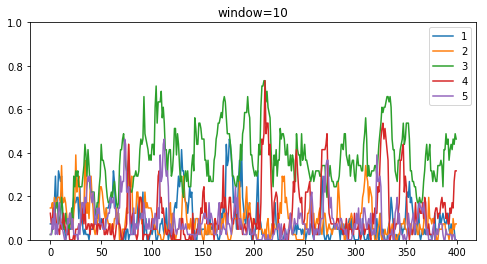

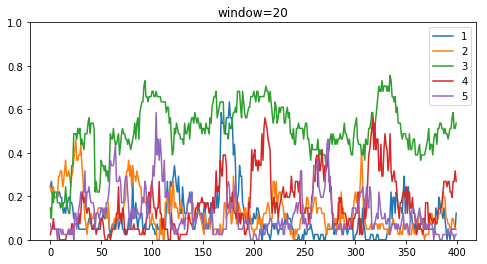

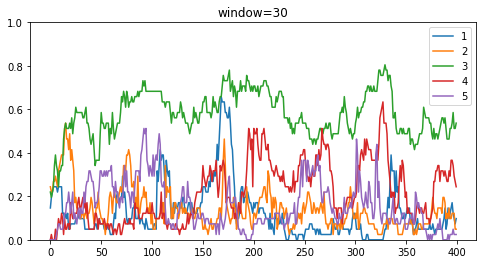

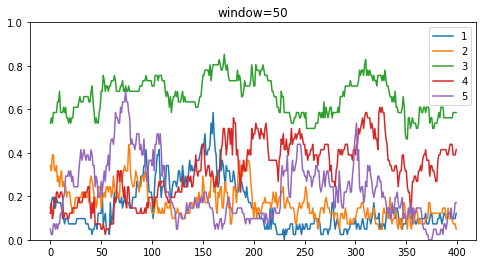

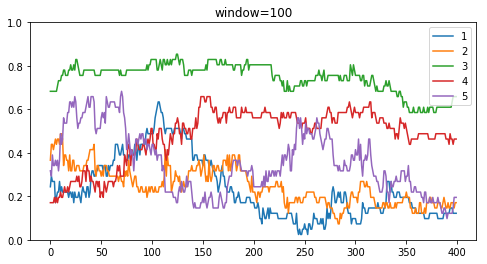

In [54]:
for window in [10,20,30,50,100]:
    cols = ['bars'+str(i+1) for i in range(5)]
    pMat = np.empty((NSub, data['NTrials'].max()-window, 5))
    pMat[:] = np.nan
    for iSub, sub in enumerate(subList):
        dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
        for i in np.arange(dataSub.loc[0,'NTrials']-window):
            dataWindow = dataSub.iloc[i:i+window]
            for iBar in range(5):
                r, p = sp.stats.pearsonr(dataWindow['response'], dataWindow['bars'+str(iBar+1)])
                pMat[iSub, i, iBar] = p
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    for iBar in range(5):
        ax.plot(np.nanmean(pMat[:,range(data['NTrials'].min()),iBar]<0.05,axis=0), label=iBar+1)
    ax.legend()
    ax.set_ylim([0,1])
    ax.set_title('window='+str(window))

#### try linear regression (with a constant term) with sliding windows

/Users/mingyusong/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in less


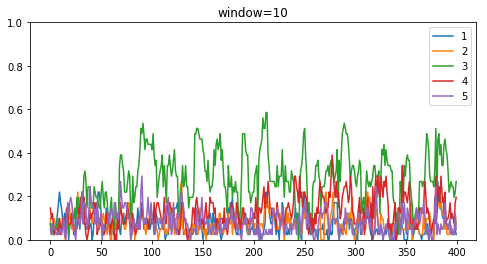

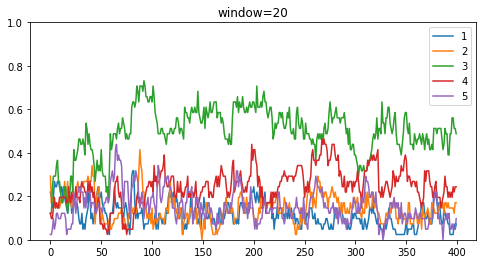

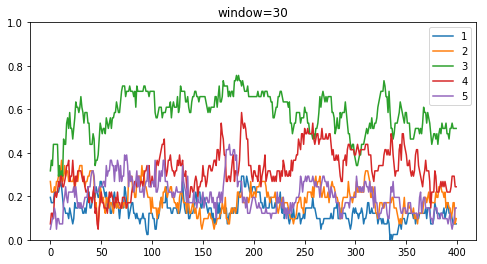

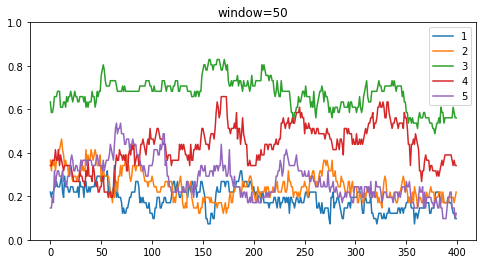

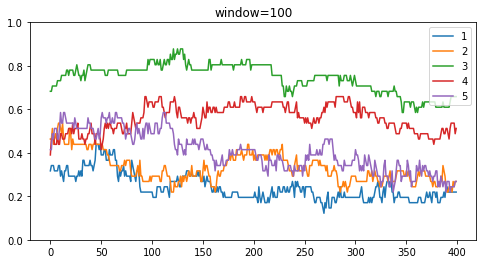

In [53]:
import statsmodels.api as sm

for window in [10,20,30,50,100]:
    cols = ['bars'+str(i+1) for i in range(5)]
    pMat = np.empty((NSub, data['NTrials'].max()-window, 5))
    pMat[:] = np.nan
#     inCIMat = np.empty((NSub, data['NTrials'].max()-window, 5))
#     inCIMat[:] = np.nan
    for iSub, sub in enumerate(subList):
        dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
        for i in np.arange(dataSub.loc[0,'NTrials']-window):
            dataWindow = dataSub.iloc[i:i+window]
            X = dataWindow[cols].values
            y = dataWindow['response'].values
            X = sm.add_constant(X)
            mod = sm.OLS(y, X)
            res = mod.fit()
            pMat[iSub, i, :] = res.pvalues[1:]
#             trueBeta = dataSub.loc[0,'weights'+str(iBar+1)]
#             inCIMat[iSub, i, iBar] = (res.conf_int().loc['bars'+str(iBar+1),1] > trueBeta) & (res.conf_int().loc['bars'+str(iBar+1),0] < trueBeta)
    fig, ax = plt.subplots(1,1,figsize=(8,4))
    for iBar in range(5):
        ax.plot(np.nanmean(pMat[:,range(data['NTrials'].min()),iBar]<0.05,axis=0), label=iBar+1)
    ax.legend()
    ax.set_ylim([0,1])
    ax.set_title('window='+str(window))

#### try correlation with every few blocks

/Users/mingyusong/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


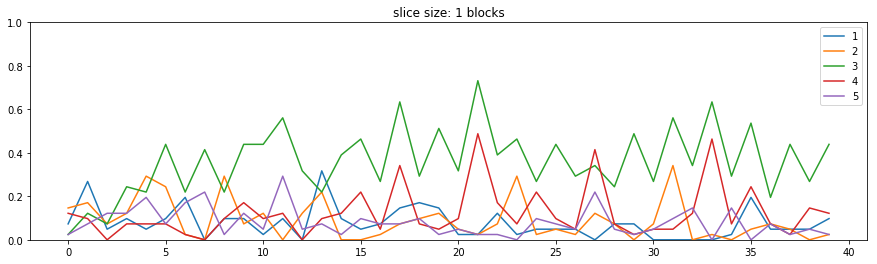

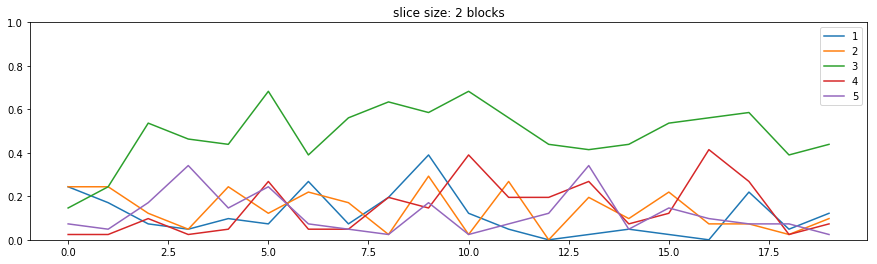

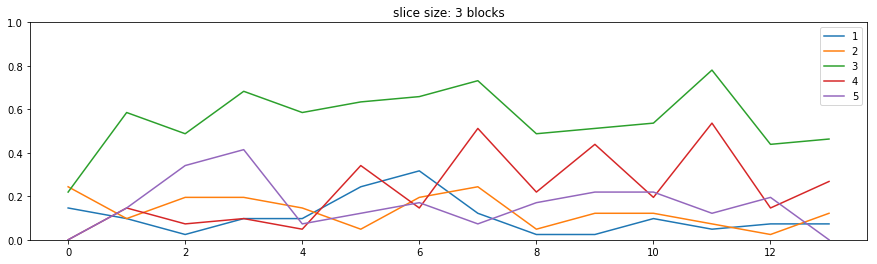

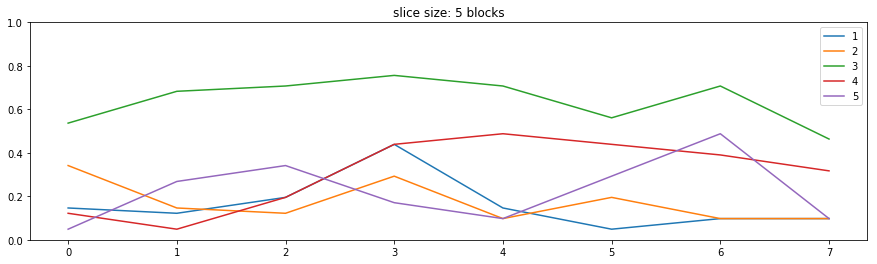

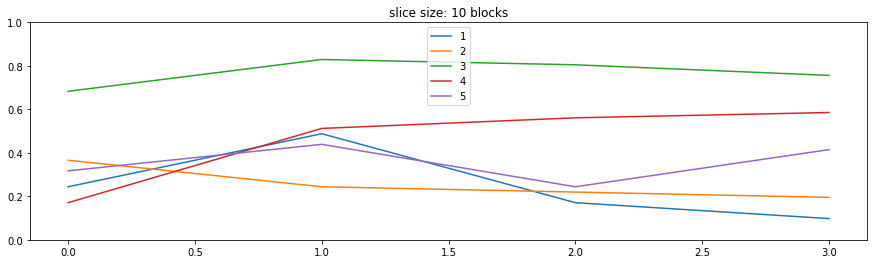

In [49]:
nTrialsPerBlock = 10
for nBlocks in [1,2,3,5,10]:
    sliceSize = nBlocks*nTrialsPerBlock
    cols = ['bars'+str(i+1) for i in range(5)]
    pMat = np.empty((NSub, int(np.ceil(data['NTrials'].max()/sliceSize)), 5))
    pMat[:] = np.nan
    for iSub, sub in enumerate(subList):
        dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
        for i in range(int(np.ceil(dataSub.loc[0,'NTrials']/sliceSize)-1)):
            dataSlice = dataSub.iloc[int(i*sliceSize):int(np.min([(i+1)*sliceSize,dataSub.shape[0]]))]
            for iBar in range(5):
                r, p = sp.stats.pearsonr(dataSlice['response'], dataSlice['bars'+str(iBar+1)])
                pMat[iSub, i, iBar] = p
    fig, ax = plt.subplots(1,1,figsize=(15,4))
    for iBar in range(5):
        ax.plot(np.nanmean(pMat[:,range(int(np.ceil(data['NTrials'].min()/sliceSize))),iBar]<0.05,axis=0), label=iBar+1)
    ax.legend()
    ax.set_ylim([0,1])
    ax.set_title('slice size: ' + str(nBlocks) + ' blocks')

#### try linear regression (with a constant term) with every few blocks

/Users/mingyusong/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


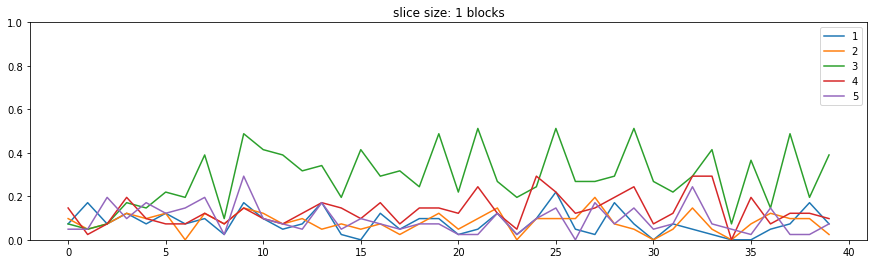

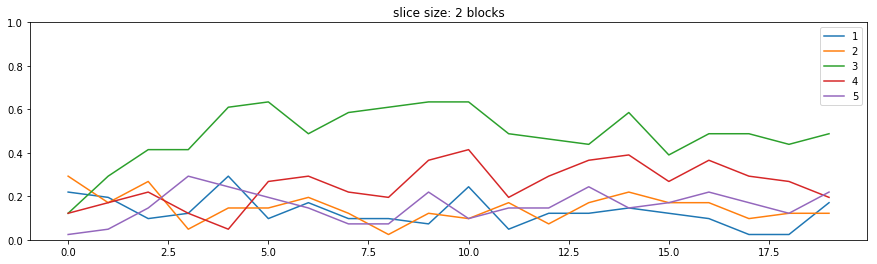

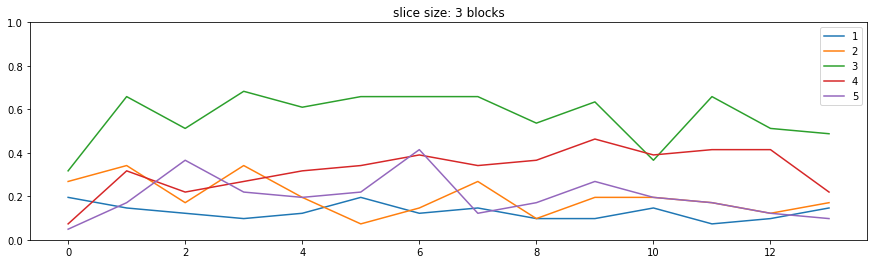

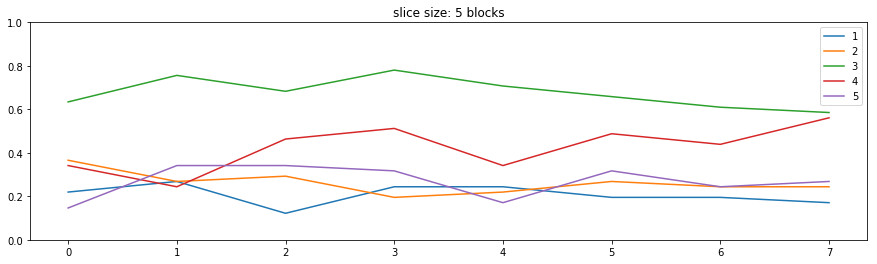

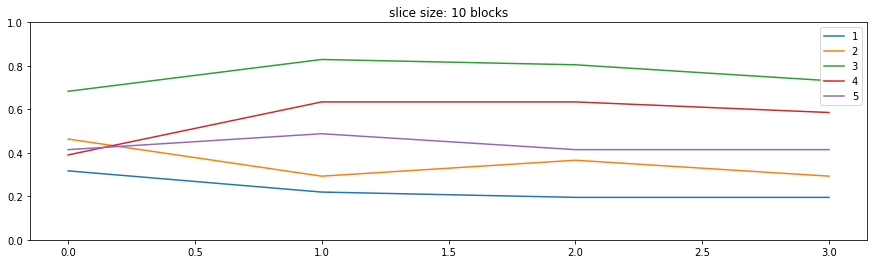

In [51]:
import statsmodels.api as sm

nTrialsPerBlock = 10
for nBlocks in [1,2,3,5,10]:
    sliceSize = nBlocks*nTrialsPerBlock
    cols = ['bars'+str(i+1) for i in range(5)]
    pMat = np.empty((NSub, int(np.ceil(data['NTrials'].max()/sliceSize)), 5))
    pMat[:] = np.nan
    for iSub, sub in enumerate(subList):
        dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
        for i in range(int(np.ceil(dataSub.loc[0,'NTrials']/sliceSize)-1)):
            dataSlice = dataSub.iloc[int(i*sliceSize):int(np.min([(i+1)*sliceSize,dataSub.shape[0]]))]
            X = dataSlice[cols].values
            y = dataSlice['response'].values
            X = sm.add_constant(X)
            mod = sm.OLS(y, X)
            res = mod.fit()
            pMat[iSub, i, :] = res.pvalues[1:]
    fig, ax = plt.subplots(1,1,figsize=(15,4))
    for iBar in range(5):
        ax.plot(np.nanmean(pMat[:,range(int(np.ceil(data['NTrials'].min()/sliceSize))),iBar]<0.05,axis=0), label=iBar+1)
    ax.legend()
    ax.set_ylim([0,1])
    ax.set_title('slice size: ' + str(nBlocks) + ' blocks')

In [8]:
%load_ext rpy2.ipython

In [ ]:
%%R -i df -o resid -o fitted

### Estimate the coefficients people use

#### with sliding windows

In [71]:
beta = [0.12, 0.02, 0.55, 0.25, 0.06]

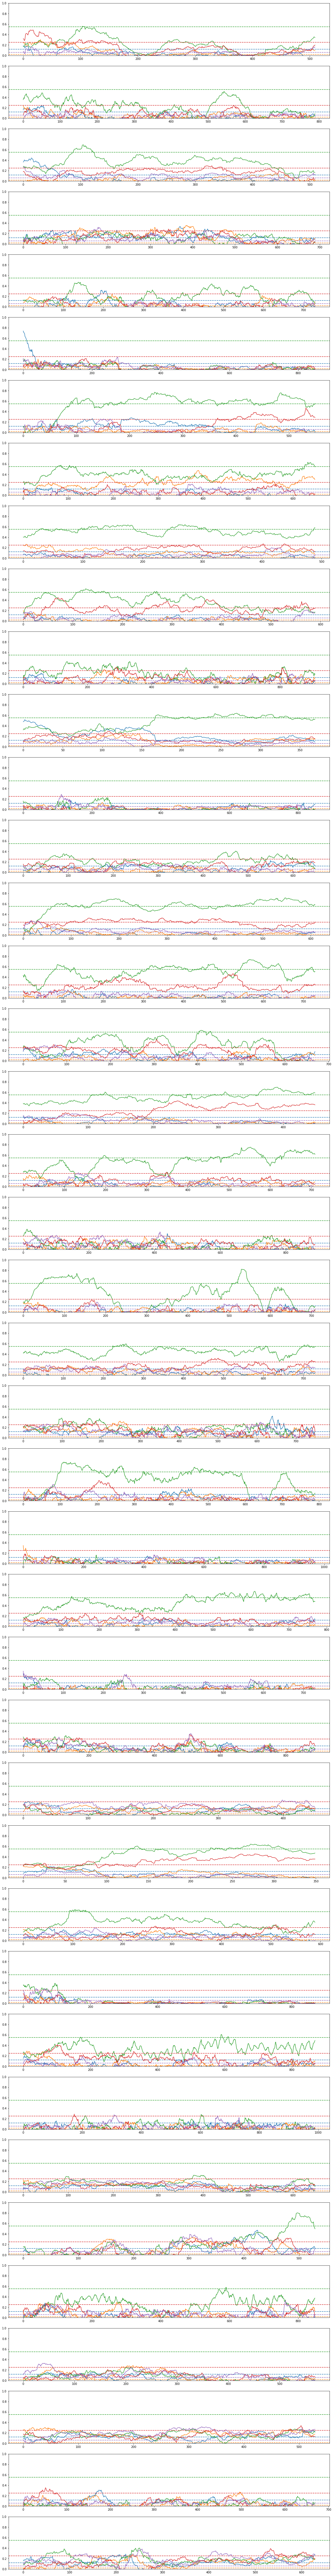

In [73]:
import statsmodels.api as sm

window = 50

fig, axes = plt.subplots(len(subList),1,figsize=(20,4*len(subList)))
cols = ['bars'+str(i+1) for i in range(5)]
coef = np.empty((NSub, data['NTrials'].max()-window, 6))
coef[:] = np.nan
for iSub, sub in enumerate(subList):
    dataSub = data[(data['sub']==sub)].copy().reset_index(drop=True)
    for i in np.arange(dataSub.loc[0,'NTrials']-window):
        dataWindow = dataSub.iloc[i:i+window]
        X = dataWindow[cols].values
        y = dataWindow['response'].values
        X = sm.add_constant(X)
        mod = sm.OLS(y, X)
        res = mod.fit()
        coef[iSub, i, -1] = res.params[0]/100
        coef[iSub, i, 0:-1] = res.params[1:]
    for iBar in range(5):
        axes[iSub].plot(coef[iSub, :, iBar], color='C'+str(iBar))
        axes[iSub].axhline(y=beta[iBar], linestyle='--', color='C'+str(iBar))
    axes[iSub].set_ylim([0,1])

### Early learning trials